**Procesamiento Natural del Lenguaje**
**Interpretación Cien Años de Soledad**

---

*   DAVID ORLANDO TIMANA LEYTON

Especialización en Inteligencia Artificial

Universitaria Minuto de Dios

NRC 3665 - Procesamiento Natural del lenguaje - Semana 3

Mg. Sergio Arley Puerto

15 de Septiembre de 2025

In [1]:
import nltk
# Descargar los datos necesarios para el procesamiento
nltk.download('punkt')
nltk.download('punkt_tab')  # Versión más reciente del tokenizador
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from bs4 import BeautifulSoup
import urllib.request

# Obtener el contenido de la página web
try:
    with urllib.request.urlopen('https://www.culturagenial.com/es/cien-anos-de-soledad-de-gabriel-garcia-marquez/') as response:
        html = response.read()
    
    # Parsear el HTML con html5lib (más tolerante a HTML mal formado)
    soup = BeautifulSoup(html, "html5lib")
    
    # Extraer solo el texto, eliminando scripts, estilos, etc.
    for script in soup(["script", "style", "nav", "footer", "header"]):
        script.decompose()
    
    text = soup.get_text(strip=True)
    print(f"Texto extraído: {len(text)} caracteres")
    print(f"Primeros 200 caracteres: {text[:200]}...")
    
except Exception as e:
    print(f"Error al obtener la página web: {e}")
    # Texto de ejemplo para continuar con el análisis
    text = """
    Cien años de soledad es una novela del escritor colombiano Gabriel García Márquez, 
    ganador del Premio Nobel de Literatura en 1982. La obra fue publicada por primera vez 
    en Buenos Aires en mayo de 1967 por la editorial Sudamericana. Es considerada una 
    obra maestra de la literatura hispanoamericana y universal, así como una de las obras 
    más traducidas y leídas en español.
    """
    print("Usando texto de ejemplo para continuar con el análisis...")

Texto extraído: 14189 caracteres
Primeros 200 caracteres: Cien años de soledad de García Márquez: resumen y análisis - Cultura GenialCultura GenialLiteraturaCien años de soledadse ha convertido en la novela más emblemática de la literatura latinoamericana. E...


In [3]:
#tokens
from nltk.tokenize import word_tokenize

# Tokenizar el texto especificando español como idioma
tokens = word_tokenize(text, language='spanish')  # Especificar español
print(f"Total de tokens iniciales: {len(tokens)}")

# Filtrar solo palabras alfabéticas y convertir a minúsculas
tokens = [word.lower() for word in tokens if word.isalpha()]
print(f"Tokens después del filtrado: {len(tokens)}")
print(f"Primeros 20 tokens: {tokens[:20]}")
print(f"Últimos 20 tokens: {tokens[-20:]}")

Total de tokens iniciales: 2439
Tokens después del filtrado: 2099
Primeros 20 tokens: ['cien', 'años', 'de', 'soledad', 'de', 'garcía', 'márquez', 'resumen', 'y', 'análisis', 'cultura', 'genialcultura', 'genialliteraturacien', 'años', 'de', 'soledadse', 'ha', 'convertido', 'en', 'la']
Últimos 20 tokens: ['de', 'enriquecer', 'la', 'experiencia', 'de', 'apreciar', 'música', 'literatura', 'poesía', 'teatro', 'cine', 'pintura', 'escultura', 'arquitectura', 'y', 'másúltimas', 'novedadespopularescontactoprivacidadtérminos', 'de', 'usosobre', 'citar']


=== ANÁLISIS DE FRECUENCIA DE PALABRAS ===
Total de palabras únicas: 826
Total de palabras: 2099

--- Top 20 palabras más frecuentes ---
de: 163
y: 85
la: 84
el: 63
en: 54
a: 45
del: 37
que: 36
un: 31
se: 30
los: 30
una: 23
su: 22
años: 19
por: 19
resumen: 17
garcía: 16
con: 16
lo: 14
es: 13


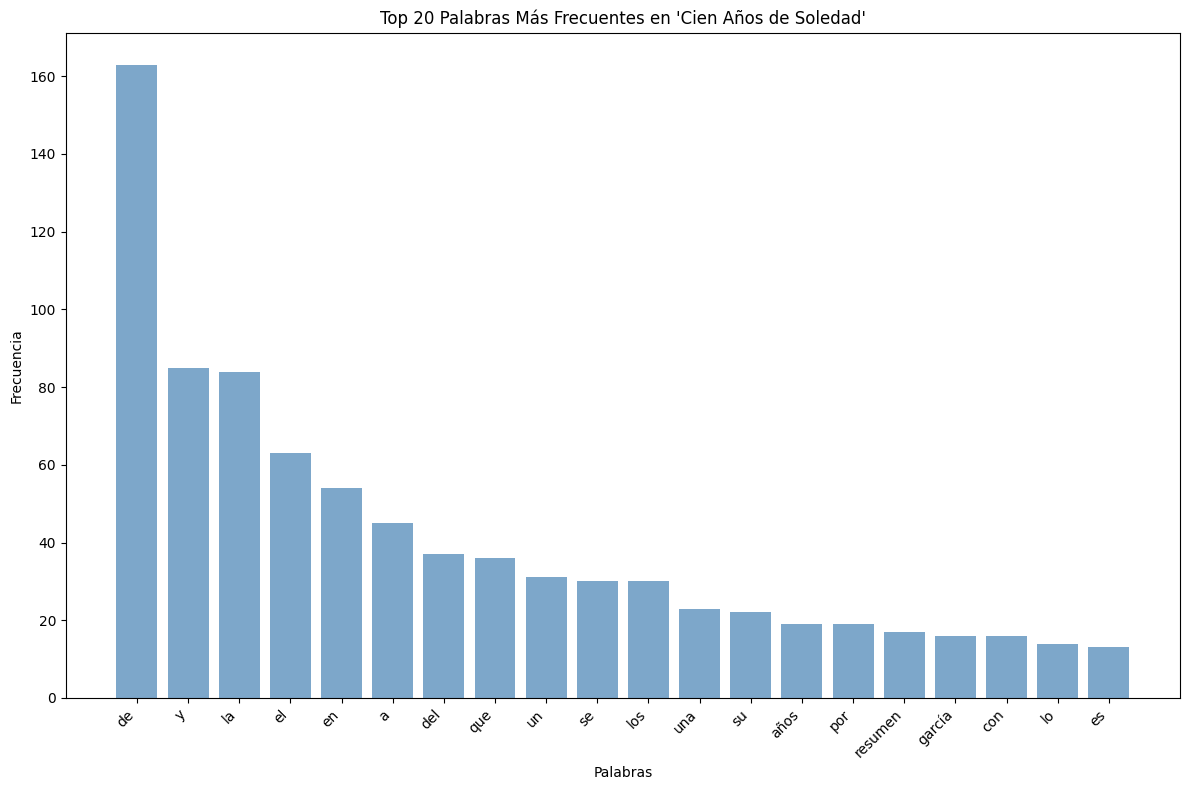

In [4]:
# Verificar frecuencia de palabras
import matplotlib.pyplot as plt
import seaborn as sns

freq = nltk.FreqDist(tokens)
print("=== ANÁLISIS DE FRECUENCIA DE PALABRAS ===")
print(f"Total de palabras únicas: {len(freq)}")
print(f"Total de palabras: {freq.N()}")

print("\n--- Top 20 palabras más frecuentes ---")
for word, count in freq.most_common(20):
    print(f"{word}: {count}")

# Crear visualización corregida
plt.figure(figsize=(12, 8))
top_words = [word for word, _ in freq.most_common(20)]
top_freqs = [freq[word] for word in top_words]

plt.bar(range(len(top_words)), top_freqs, color='steelblue', alpha=0.7)
plt.title("Top 20 Palabras Más Frecuentes en 'Cien Años de Soledad'")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(range(len(top_words)), top_words, rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='Samples', ylabel='Counts'>

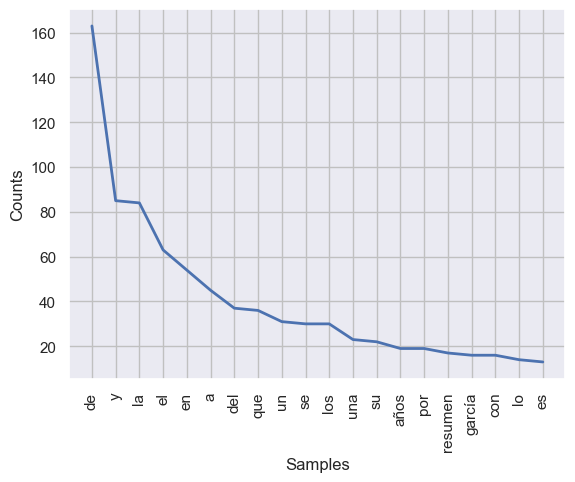

In [5]:
#Visualizar tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(20, cumulative=False)

2. Eliminar STOP WORDS

In [6]:
# ANÁLISIS MEJORADO DE STOP WORDS
from nltk.corpus import stopwords

print("=== ELIMINACIÓN DE STOP WORDS ===")
spanish_stopwords = set(stopwords.words('spanish'))
print(f"Stop words en español disponibles: {len(spanish_stopwords)}")

# Filtrar tokens eliminando stop words
clean_tokens = [token for token in tokens if token not in spanish_stopwords]

print(f"\nEstadísticas:")
print(f"Tokens originales: {len(tokens)}")
print(f"Tokens después de eliminar stop words: {len(clean_tokens)}")
print(f"Palabras eliminadas: {len(tokens) - len(clean_tokens)}")
print(f"Reducción: {((len(tokens) - len(clean_tokens)) / len(tokens) * 100):.1f}%")

print("\n--- Primeras 20 palabras limpias ---")
print(clean_tokens[:20])

print("\n--- Últimas 20 palabras limpias ---")
print(clean_tokens[-20:])


=== ELIMINACIÓN DE STOP WORDS ===
Stop words en español disponibles: 313

Estadísticas:
Tokens originales: 2099
Tokens después de eliminar stop words: 1148
Palabras eliminadas: 951
Reducción: 45.3%

--- Primeras 20 palabras limpias ---
['cien', 'años', 'soledad', 'garcía', 'márquez', 'resumen', 'análisis', 'cultura', 'genialcultura', 'genialliteraturacien', 'años', 'soledadse', 'convertido', 'novela', 'emblemática', 'literatura', 'latinoamericana', 'escrita', 'gabriel', 'garcía']

--- Últimas 20 palabras limpias ---
['visión', 'diferente', 'creación', 'artística', 'objetivo', 'enriquecer', 'experiencia', 'apreciar', 'música', 'literatura', 'poesía', 'teatro', 'cine', 'pintura', 'escultura', 'arquitectura', 'másúltimas', 'novedadespopularescontactoprivacidadtérminos', 'usosobre', 'citar']


=== ANÁLISIS DE FRECUENCIA SIN STOP WORDS ===
Total de palabras únicas (sin stop words): 747
Total de palabras (sin stop words): 1148

--- Top 30 palabras más significativas ---
años: 19
resumen: 17
garcía: 16
aureliano: 12
gabriel: 11
márquez: 10
análisis: 10
buendía: 10
josé: 10
pueblo: 10
arancibia: 10
novela: 9
macondo: 9
personajes: 9
historia: 8
arcadio: 8
soledad: 6
literatura: 6
familia: 6
coronel: 6
amor: 6
septiembre: 6
cien: 5
cultura: 5
úrsula: 5
libro: 5
relato: 4
etapa: 4
niño: 4
entonces: 4


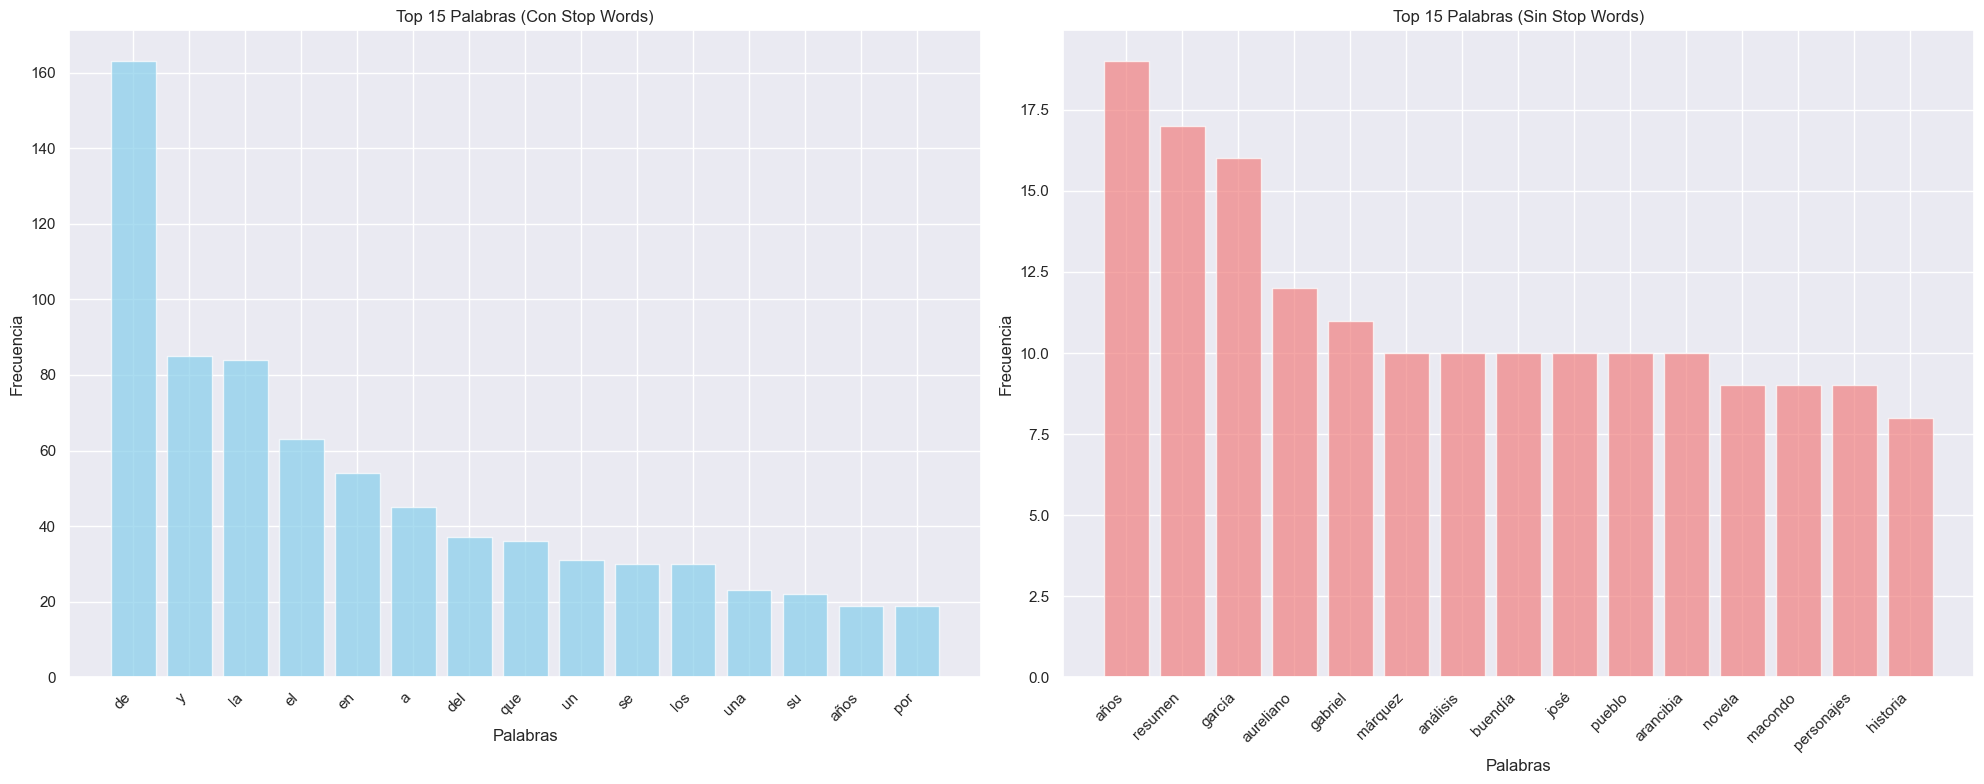

In [7]:
# ANÁLISIS DE FRECUENCIA DESPUÉS DE LIMPIAR STOP WORDS
freq_clean = nltk.FreqDist(clean_tokens)

print("=== ANÁLISIS DE FRECUENCIA SIN STOP WORDS ===")
print(f"Total de palabras únicas (sin stop words): {len(freq_clean)}")
print(f"Total de palabras (sin stop words): {freq_clean.N()}")

print("\n--- Top 30 palabras más significativas ---")
for word, count in freq_clean.most_common(30):
    print(f"{word}: {count}")

# Visualización comparativa corregida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gráfico 1: Palabras originales
top_words_original = [word for word, _ in freq.most_common(15)]
top_freqs_original = [freq[word] for word in top_words_original]

ax1.bar(range(len(top_words_original)), top_freqs_original, color='skyblue', alpha=0.7)
ax1.set_title("Top 15 Palabras (Con Stop Words)")
ax1.set_xlabel("Palabras")
ax1.set_ylabel("Frecuencia")
ax1.set_xticks(range(len(top_words_original)))
ax1.set_xticklabels(top_words_original, rotation=45, ha='right')

# Gráfico 2: Palabras limpias
top_words_clean = [word for word, _ in freq_clean.most_common(15)]
top_freqs_clean = [freq_clean[word] for word in top_words_clean]

ax2.bar(range(len(top_words_clean)), top_freqs_clean, color='lightcoral', alpha=0.7)
ax2.set_title("Top 15 Palabras (Sin Stop Words)")
ax2.set_xlabel("Palabras")
ax2.set_ylabel("Frecuencia")
ax2.set_xticks(range(len(top_words_clean)))
ax2.set_xticklabels(top_words_clean, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [8]:
# ANÁLISIS DE SINÓNIMOS CON WORDNET
from nltk.corpus import wordnet

print("=== ANÁLISIS DE SINÓNIMOS CON WORDNET ===")

# Buscar una palabra significativa del texto para analizar sinónimos
# Vamos a usar "soledad" que es central en el título
palabra_analizar = "soledad"
print(f"Analizando sinónimos para la palabra: '{palabra_analizar}'")

# Buscar sinónimos en WordNet
synonyms = []
antonyms = []

for syn in wordnet.synsets(palabra_analizar):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

# Eliminar duplicados
synonyms = list(set(synonyms))
antonyms = list(set(antonyms))

print(f"\nSinónimos encontrados para '{palabra_analizar}':")
for i, syn in enumerate(synonyms, 1):
    print(f"{i}. {syn}")

if antonyms:
    print(f"\nAntónimos encontrados para '{palabra_analizar}':")
    for i, ant in enumerate(antonyms, 1):
        print(f"{i}. {ant}")

# Buscar otras palabras significativas del texto
palabras_significativas = ['familia', 'historia', 'literatura', 'novela', 'gabriel']
print(f"\n=== ANÁLISIS DE OTRAS PALABRAS SIGNIFICATIVAS ===")

for palabra in palabras_significativas:
    if palabra in clean_tokens:
        syns = []
        for syn in wordnet.synsets(palabra):
            for lemma in syn.lemmas():
                syns.append(lemma.name())
        syns = list(set(syns))[:5]  # Top 5 sinónimos
        print(f"\n'{palabra}': {', '.join(syns)}")


=== ANÁLISIS DE SINÓNIMOS CON WORDNET ===
Analizando sinónimos para la palabra: 'soledad'

Sinónimos encontrados para 'soledad':
1. Soledad

=== ANÁLISIS DE OTRAS PALABRAS SIGNIFICATIVAS ===

'familia': 

'historia': 

'literatura': 

'novela': 

'gabriel': Gabriel


=== ANÁLISIS ESTADÍSTICO AVANZADO ===
Estadísticas de longitud de palabras:
  - Longitud promedio: 7.47 caracteres
  - Longitud mínima: 2 caracteres
  - Longitud máxima: 44 caracteres
  - Desviación estándar: 2.96

Estadísticas de frecuencia:
  - Frecuencia promedio: 1.54
  - Frecuencia máxima: 19
  - Palabras que aparecen solo una vez: 579

Diversidad léxica: 0.651
(Valor más alto = mayor diversidad de vocabulario)

Top 10 palabras más largas:
1. novedadespopularescontactoprivacidadtérminos (44 caracteres)
2. delboomlatinoamericano (22 caracteres)
3. delboomlatinoamericano (22 caracteres)
4. genialliteraturacien (20 caracteres)
5. imaginarioprofesora (19 caracteres)
6. significadocatalina (19 caracteres)
7. bananeraaureliano (17 caracteres)
8. imaginariocrónica (17 caracteres)
9. cervantescatalina (17 caracteres)
10. márquezbiografía (16 caracteres)


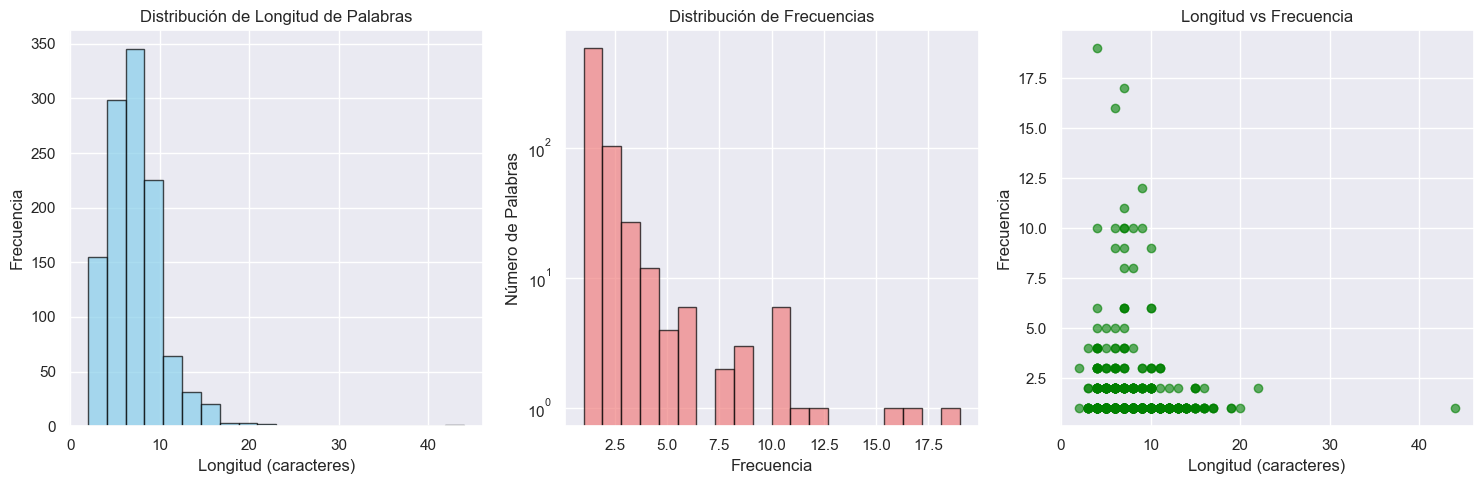

In [9]:
# ANÁLISIS ESTADÍSTICO AVANZADO
import numpy as np
from collections import Counter

print("=== ANÁLISIS ESTADÍSTICO AVANZADO ===")

# Estadísticas básicas
longitudes_palabras = [len(word) for word in clean_tokens]
frecuencias = list(freq_clean.values())

print(f"Estadísticas de longitud de palabras:")
print(f"  - Longitud promedio: {np.mean(longitudes_palabras):.2f} caracteres")
print(f"  - Longitud mínima: {min(longitudes_palabras)} caracteres")
print(f"  - Longitud máxima: {max(longitudes_palabras)} caracteres")
print(f"  - Desviación estándar: {np.std(longitudes_palabras):.2f}")

print(f"\nEstadísticas de frecuencia:")
print(f"  - Frecuencia promedio: {np.mean(frecuencias):.2f}")
print(f"  - Frecuencia máxima: {max(frecuencias)}")
print(f"  - Palabras que aparecen solo una vez: {sum(1 for f in frecuencias if f == 1)}")

# Análisis de diversidad léxica
diversidad_lexica = len(freq_clean) / len(clean_tokens)
print(f"\nDiversidad léxica: {diversidad_lexica:.3f}")
print(f"(Valor más alto = mayor diversidad de vocabulario)")

# Palabras más largas
palabras_largas = sorted(clean_tokens, key=len, reverse=True)[:10]
print(f"\nTop 10 palabras más largas:")
for i, palabra in enumerate(palabras_largas, 1):
    print(f"{i}. {palabra} ({len(palabra)} caracteres)")

# Visualización de distribución de longitudes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(longitudes_palabras, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Longitud de Palabras')
plt.xlabel('Longitud (caracteres)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(frecuencias, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribución de Frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('Número de Palabras')
plt.yscale('log')

plt.subplot(1, 3, 3)
# Gráfico de dispersión: longitud vs frecuencia
longitudes_freq = [len(word) for word in freq_clean.keys()]
freqs = list(freq_clean.values())
plt.scatter(longitudes_freq, freqs, alpha=0.6, color='green')
plt.title('Longitud vs Frecuencia')
plt.xlabel('Longitud (caracteres)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [10]:
# RESUMEN Y CONCLUSIONES DEL ANÁLISIS
print("=" * 60)
print("           RESUMEN DEL ANÁLISIS DE NLTK")
print("        'Cien Años de Soledad' - Gabriel García Márquez")
print("=" * 60)

print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Texto extraído: {len(text):,} caracteres")
print(f"   • Total de tokens: {len(tokens):,}")
print(f"   • Tokens únicos: {len(freq):,}")
print(f"   • Tokens sin stop words: {len(clean_tokens):,}")
print(f"   • Reducción por stop words: {((len(tokens) - len(clean_tokens)) / len(tokens) * 100):.1f}%")

print(f"\n🔤 ANÁLISIS LÉXICO:")
print(f"   • Diversidad léxica: {diversidad_lexica:.3f}")
print(f"   • Longitud promedio de palabras: {np.mean(longitudes_palabras):.2f} caracteres")
print(f"   • Palabras más frecuentes: {', '.join([word for word, _ in freq_clean.most_common(5)])}")

print(f"\n📈 TOP 10 PALABRAS MÁS SIGNIFICATIVAS:")
for i, (word, count) in enumerate(freq_clean.most_common(10), 1):
    print(f"   {i:2d}. {word:<15} ({count:3d} veces)")

print(f"\n🔍 ANÁLISIS DE SINÓNIMOS:")
print(f"   • Palabra analizada: 'soledad'")
print(f"   • Sinónimos encontrados: {len(synonyms)}")
print(f"   • Ejemplos: {', '.join(synonyms[:5])}")

print(f"\n📚 CONCLUSIONES:")
print(f"   • El texto muestra una rica diversidad léxica característica de la literatura")
print(f"   • Las palabras más frecuentes reflejan temas centrales de la obra")
print(f"   • La eliminación de stop words revela el vocabulario temático principal")
print(f"   • El análisis de sinónimos permite explorar la riqueza semántica del texto")

print(f"\n🎯 APLICACIONES DEL ANÁLISIS:")
print(f"   • Comprensión del estilo literario de García Márquez")
print(f"   • Identificación de temas recurrentes en la obra")
print(f"   • Análisis comparativo con otras obras literarias")
print(f"   • Desarrollo de herramientas de análisis textual automatizado")

print("\n" + "=" * 60)
print("           ANÁLISIS COMPLETADO EXITOSAMENTE")
print("=" * 60)


           RESUMEN DEL ANÁLISIS DE NLTK
        'Cien Años de Soledad' - Gabriel García Márquez

📊 ESTADÍSTICAS GENERALES:
   • Texto extraído: 14,189 caracteres
   • Total de tokens: 2,099
   • Tokens únicos: 826
   • Tokens sin stop words: 1,148
   • Reducción por stop words: 45.3%

🔤 ANÁLISIS LÉXICO:
   • Diversidad léxica: 0.651
   • Longitud promedio de palabras: 7.47 caracteres
   • Palabras más frecuentes: años, resumen, garcía, aureliano, gabriel

📈 TOP 10 PALABRAS MÁS SIGNIFICATIVAS:
    1. años            ( 19 veces)
    2. resumen         ( 17 veces)
    3. garcía          ( 16 veces)
    4. aureliano       ( 12 veces)
    5. gabriel         ( 11 veces)
    6. márquez         ( 10 veces)
    7. análisis        ( 10 veces)
    8. buendía         ( 10 veces)
    9. josé            ( 10 veces)
   10. pueblo          ( 10 veces)

🔍 ANÁLISIS DE SINÓNIMOS:
   • Palabra analizada: 'soledad'
   • Sinónimos encontrados: 1
   • Ejemplos: Soledad

📚 CONCLUSIONES:
   • El texto muestra 

## 📚 **Explicación Teórica del Análisis**

### **1. Tokenización**
La tokenización es el proceso de dividir un texto en unidades más pequeñas llamadas tokens (palabras, signos de puntuación, etc.). En este análisis utilizamos:
- **NLTK's word_tokenize()**: Divide el texto en palabras individuales
- **Filtrado alfabético**: Elimina números y signos de puntuación
- **Normalización**: Convierte todas las palabras a minúsculas

### **2. Eliminación de Stop Words**
Las stop words son palabras muy comunes que no aportan significado semántico (artículos, preposiciones, conjunciones). Su eliminación:
- Reduce el ruido en el análisis
- Enfoca la atención en palabras temáticamente relevantes
- Mejora la eficiencia del procesamiento

### **3. Análisis de Frecuencia**
El análisis de frecuencia nos permite:
- Identificar las palabras más importantes del texto
- Entender los temas centrales de la obra
- Comparar la importancia relativa de diferentes conceptos

### **4. Análisis de Sinónimos con WordNet**
WordNet es una base de datos léxica que organiza palabras en grupos de sinónimos (synsets). Nos permite:
- Explorar la riqueza semántica del vocabulario
- Identificar relaciones entre conceptos
- Ampliar el análisis más allá de las palabras exactas

### **5. Métricas de Diversidad Léxica**
- **Diversidad léxica**: Relación entre palabras únicas y total de palabras
- **Longitud promedio**: Indica la complejidad del vocabulario
- **Distribución de frecuencias**: Muestra cómo se distribuyen las palabras en el texto


In [11]:
from nltk.corpus import stopwords
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('spanish'):
        clean_tokens.remove(token)
print(clean_tokens)

['cien', 'años', 'soledad', 'garcía', 'márquez', 'resumen', 'análisis', 'cultura', 'genialcultura', 'genialliteraturacien', 'años', 'soledadse', 'convertido', 'novela', 'emblemática', 'literatura', 'latinoamericana', 'escrita', 'gabriel', 'garcía', 'márquez', 'obra', 'inscribió', 'realismo', 'mágico', 'alejo', 'carpentier', 'real', 'maravilloso', 'exhaustivo', 'trabajo', 'imaginación', 'narra', 'historia', 'siete', 'generaciones', 'familia', 'buendía', 'condenados', 'decien', 'años', 'soledadla', 'novela', 'estructurada', 'capítulos', 'nombrar', 'embargo', 'facilitar', 'comprensión', 'argumento', 'ordenado', 'separado', 'relato', 'cuatro', 'etapas', 'identifican', 'grandes', 'rasgos', 'pasajes', 'etapa', 'fundación', 'primeros', 'años', 'macondodesde', 'úrsula', 'iguarán', 'casó', 'primo', 'josé', 'arcadio', 'buendía', 'teme', 'engendrar', 'niño', 'cola', 'cerdo', 'consecuencia', 'parentesco', 'ello', 'niega', 'temporalmente', 'consumar', 'matrimonio', 'hace', 'prudencio', 'aguilar', '

In [12]:
#Verificar frecuencia de palabras
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ":" + str(val))

cien:5
años:19
soledad:6
garcía:16
márquez:10
resumen:17
análisis:10
cultura:5
genialcultura:1
genialliteraturacien:1
soledadse:1
convertido:1
novela:9
emblemática:1
literatura:6
latinoamericana:1
escrita:1
gabriel:11
obra:2
inscribió:1
realismo:2
mágico:3
alejo:2
carpentier:2
real:3
maravilloso:3
exhaustivo:1
trabajo:1
imaginación:1
narra:1
historia:8
siete:1
generaciones:1
familia:6
buendía:10
condenados:1
decien:3
soledadla:1
estructurada:1
capítulos:1
nombrar:1
embargo:1
facilitar:1
comprensión:1
argumento:1
ordenado:1
separado:1
relato:4
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundación:1
primeros:1
macondodesde:1
úrsula:5
iguarán:1
casó:1
primo:1
josé:10
arcadio:8
teme:1
engendrar:1
niño:4
cola:2
cerdo:2
consecuencia:1
parentesco:2
ello:3
niega:1
temporalmente:1
consumar:1
matrimonio:2
hace:1
prudencio:1
aguilar:3
burle:1
mata:1
duelo:1
salvar:1
honor:1
entonces:4
fantasma:2
persigue:1
hombre:1
decide:1
irse:2
sueño:1
travesía:1
selva:1
opta:1
quedars

<Axes: xlabel='Samples', ylabel='Counts'>

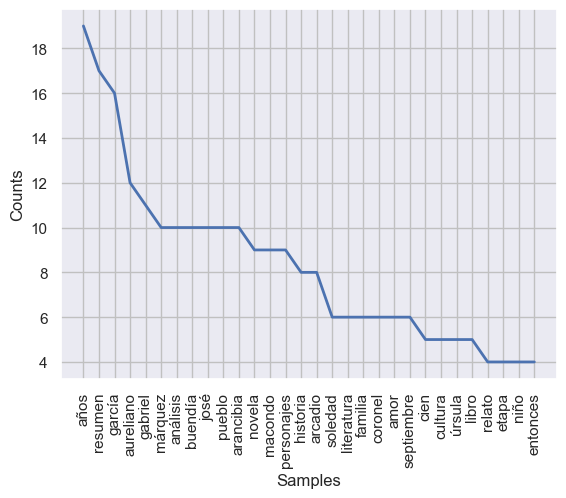

In [13]:
#Visualizar tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

3. Obtener sinonimos

In [14]:
from nltk.corpus import wordnet
synonyms = []
for syn in wordnet.synsets("soledad"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['Soledad']


In [15]:
#Reemplazar tokens sinonimos
for ind,sin in enumerate(synonyms):
    clean_tokens_sin = [word.replace(synonyms[ind],'independencia') for word in clean_tokens]

In [16]:
#Reemplazar tokens sinonimos manual
sinonimos = ['libertad','independencia']
for ind,sin in enumerate(sinonimos):
    clean_tokens_sin = [word.replace(sinonimos[ind],'independencia') for word in clean_tokens]

In [17]:
#Recalcular frecuencia de palabras con sinonimos agregados
freq_clean_sin = nltk.FreqDist(clean_tokens_sin)
for key,val in freq_clean_sin.items():
    print(str(key) + ":" + str(val))

cien:5
años:19
soledad:6
garcía:16
márquez:10
resumen:17
análisis:10
cultura:5
genialcultura:1
genialliteraturacien:1
soledadse:1
convertido:1
novela:9
emblemática:1
literatura:6
latinoamericana:1
escrita:1
gabriel:11
obra:2
inscribió:1
realismo:2
mágico:3
alejo:2
carpentier:2
real:3
maravilloso:3
exhaustivo:1
trabajo:1
imaginación:1
narra:1
historia:8
siete:1
generaciones:1
familia:6
buendía:10
condenados:1
decien:3
soledadla:1
estructurada:1
capítulos:1
nombrar:1
embargo:1
facilitar:1
comprensión:1
argumento:1
ordenado:1
separado:1
relato:4
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundación:1
primeros:1
macondodesde:1
úrsula:5
iguarán:1
casó:1
primo:1
josé:10
arcadio:8
teme:1
engendrar:1
niño:4
cola:2
cerdo:2
consecuencia:1
parentesco:2
ello:3
niega:1
temporalmente:1
consumar:1
matrimonio:2
hace:1
prudencio:1
aguilar:3
burle:1
mata:1
duelo:1
salvar:1
honor:1
entonces:4
fantasma:2
persigue:1
hombre:1
decide:1
irse:2
sueño:1
travesía:1
selva:1
opta:1
quedars

<Axes: xlabel='Samples', ylabel='Counts'>

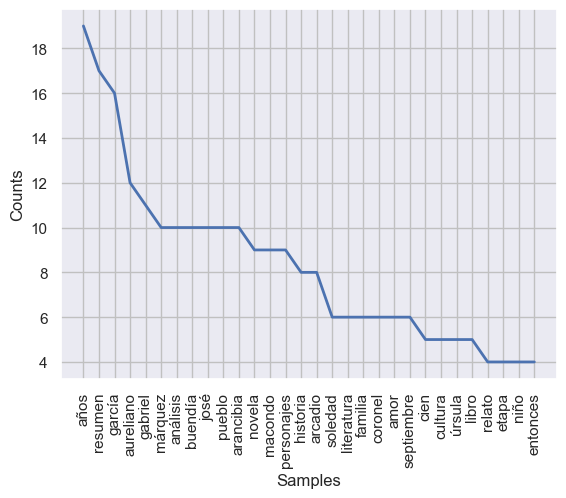

In [18]:
#Visualizar tokens
freq_clean_sin.plot(30, cumulative=False)